In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('company_nps_data.csv',encoding='cp949')

In [3]:
data.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [4]:
# Nan 값 없음
data.isna().sum()

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
dtype: int64

3년 이상 된 기업

In [5]:
data['년도'].unique()

array([2018, 2015, 2016, 2017, 2019])

In [6]:
com_19 = data[data['년도']==2019].iloc[:,0].tolist()
com_18 = data[data['년도']==2018].iloc[:,0].tolist()
com_17 = data[data['년도']==2017].iloc[:,0].tolist()

In [7]:
over_3 = list(set(com_19)&set(com_18)&set(com_17))

In [8]:
df = data[data['회사ID'].isin(over_3)]

연매출 마이너스 기업 제외

In [9]:
temp = df[df['연매출액']<0].iloc[:,0].tolist()

In [10]:
# temp가 빈 리스트로 확인 되어서 생략
# df = df[~df['회사ID'].isin(temp)]

직원수 0 기업 제외 => 3년 이상인 기업에서는 없음 5인 미만 영세기업 제외는 어떨까? 

In [10]:
temp = df[df['월별_직원수']==0].iloc[:,0].tolist()

In [11]:
# 2개 기업 해당
temp = df[df['월별_직원수']<5].iloc[:,0].tolist()

In [12]:
df = df[~df['회사ID'].isin(temp)]

연매출액 1000억 이상 기업 (연매출 단위: 천원) -> 2곳 밖에 없어서 기준 낮춤 

In [15]:
# 2개
temp = df[df['연매출액']>=100000000].iloc[:,0].tolist()

In [17]:
# 5개
temp = df[df['연매출액']>=30000000].iloc[:,0].tolist()

In [19]:
# 8개 
temp = df[df['연매출액']>=20000000].iloc[:,0].tolist()

In [13]:
# 14개
temp = df[df['연매출액']>=10000000].iloc[:,0].tolist()

In [15]:
len(set(temp))

14

In [14]:
df = df[df['회사ID'].isin(temp)]

월별로 빠진 데이터 확인

In [15]:
# 19년도 모두 있음
df[df['년도']==2019].iloc[:,0].value_counts()

135668    12
130261    12
130756    12
134575    12
128174    12
442525    12
296819    12
155754    12
419945    12
250472    12
442467    12
138077    12
165163    12
303882    12
Name: 회사ID, dtype: int64

In [16]:
# 18년도 모두 있음
df[df['년도']==2018].iloc[:,0].value_counts()

135668    12
130261    12
130756    12
134575    12
128174    12
442525    12
296819    12
155754    12
419945    12
250472    12
442467    12
138077    12
165163    12
303882    12
Name: 회사ID, dtype: int64

In [17]:
# 17년도 모두 있음
df[df['년도']==2017].iloc[:,0].value_counts()

135668    12
130261    12
130756    12
134575    12
128174    12
442525    12
296819    12
155754    12
419945    12
250472    12
442467    12
138077    12
165163    12
303882    12
Name: 회사ID, dtype: int64

In [18]:
# 16년도 모두 있음
df[df['년도']==2016].iloc[:,0].value_counts()

135668    12
130756    12
134575    12
128174    12
442525    12
296819    12
155754    12
419945    12
250472    12
442467    12
138077    12
165163    12
303882    12
Name: 회사ID, dtype: int64

In [19]:
# 15년도 데이터가 연속인지 확인 필요
df[df['년도']==2015].iloc[:,0].value_counts()

442525    2
135668    2
296819    2
134575    2
128174    2
155754    2
250472    2
130756    2
442467    2
138077    2
Name: 회사ID, dtype: int64

In [20]:
# 연속된 데이터임을 확인
df[df['년도']==2015].sort_values(by=['회사ID','월'])

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
48494,128174,113326052,2015,11,52671820,209
26950,128174,113326052,2015,12,53546240,212
52260,130756,11278490,2015,11,14891220,109
74340,130756,11278490,2015,12,13407500,98
35213,134575,14296799,2015,11,16481840,66
93407,134575,14296799,2015,12,16212560,66
1288,135668,17153956,2015,11,6889800,28
60825,135668,17153956,2015,12,8125380,33
92564,138077,57253854,2015,11,10083800,46
60759,138077,57253854,2015,12,10288820,47


보험료, 직원수, 연매출 증가율 칼럼 추가

In [21]:
# 기준을 모두 통과한 14개 회사ID
com = df['회사ID'].unique()

In [22]:
com

array([442467, 130756, 303882, 135668, 134575, 155754, 250472, 138077,
       128174, 165163, 130261, 442525, 419945, 296819])

In [23]:
df = df.sort_values(by=['회사ID','년도','월'])

In [24]:
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
48494,128174,113326052,2015,11,52671820,209
26950,128174,113326052,2015,12,53546240,212
57317,128174,108639379,2016,1,52993560,209
35809,128174,108639379,2016,2,52304800,206
77555,128174,108639379,2016,3,51112500,202
...,...,...,...,...,...,...
88470,442525,7683419,2019,8,11807480,34
51603,442525,7683419,2019,9,11829980,34
56496,442525,7683419,2019,10,11829980,34
33624,442525,7683419,2019,11,11829980,34


In [25]:
final = pd.DataFrame({'회사ID':[],'연매출액':[],'년도':[],'월':[],'월별_연금보험료':[],'월별_직원수':[],'매출':[],'보험료':[],'직원':[]})

In [26]:
final

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,매출,보험료,직원


In [27]:
for com_id in com:
  test = df[df['회사ID']==com_id]
  test[['매출','보험료','직원']] = test[['연매출액','월별_연금보험료','월별_직원수']].diff()
  final = final.append(test)

In [30]:
final[['회사ID','년도','월','월별_직원수']] = final[['회사ID','년도','월','월별_직원수']].astype(int)

In [32]:
final = final.reset_index(drop=True)
final

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,매출,보험료,직원
0,442467,42615602.0,2015,11,5914260.0,27,NaN,NaN,NaN
1,442467,42615602.0,2015,12,6045660.0,28,0.0,131400.0,1.0
2,442467,2965279.0,2016,1,5734540.0,27,-39650323.0,-311120.0,-1.0
3,442467,2965279.0,2016,2,5997340.0,29,0.0,262800.0,2.0
4,442467,2965279.0,2016,3,5862340.0,28,0.0,-135000.0,-1.0
...,...,...,...,...,...,...,...,...,...
675,296819,18262224.0,2019,8,19887560.0,54,0.0,-419660.0,-1.0
676,296819,18262224.0,2019,9,19956600.0,54,0.0,69040.0,0.0
677,296819,18262224.0,2019,10,19873800.0,54,0.0,-82800.0,0.0
678,296819,18262224.0,2019,11,20228400.0,55,0.0,354600.0,1.0


In [33]:
import matplotlib.pyplot as plt

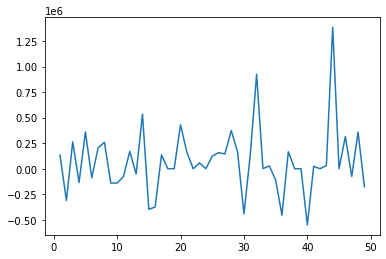

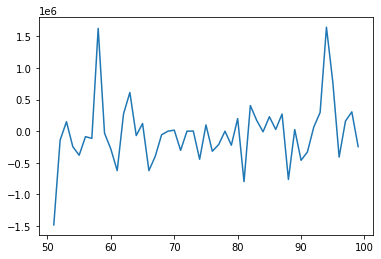

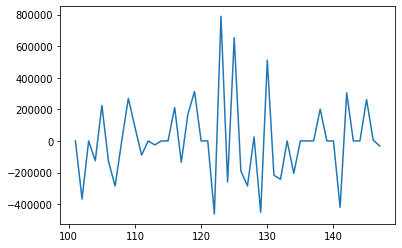

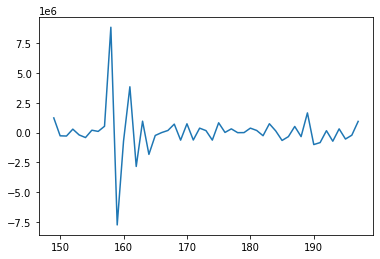

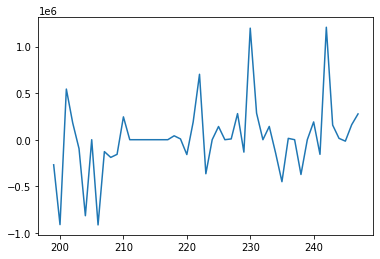

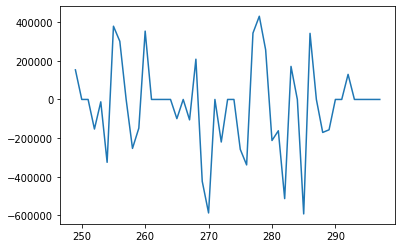

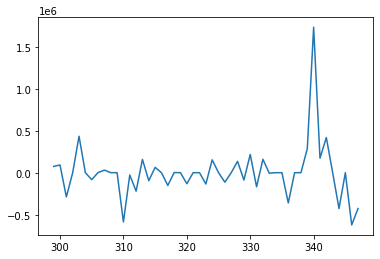

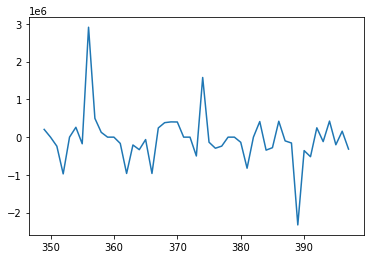

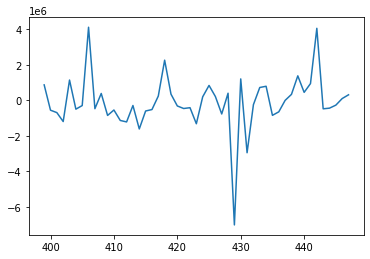

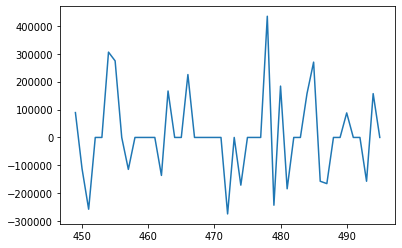

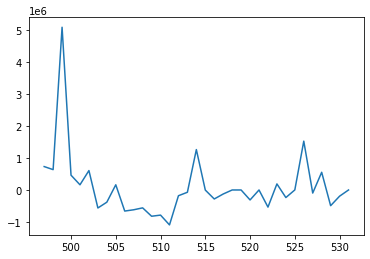

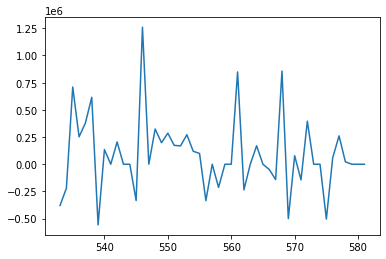

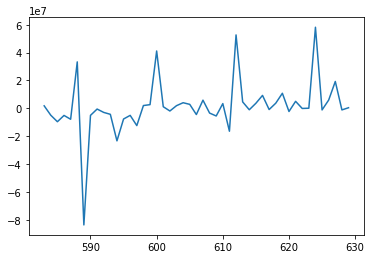

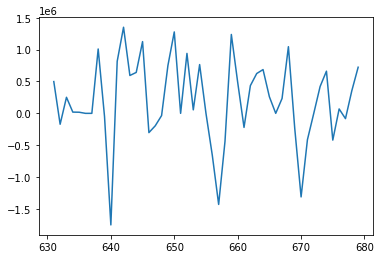

In [36]:
for com_id in com:
  test = final[final['회사ID'] == com_id]	
  plt.plot(test['보험료'])
  plt.show()